In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("D:\k means\minute_weather.csv")

In [3]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [4]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape


(158726, 13)

In [5]:
data.shape

(1587257, 13)

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,1587257.0,793628.000000,458201.772448,0.00,396814.0,793628.00,1190442.00,1587256.00
air_pressure,1587257.0,916.830127,3.051593,905.00,914.8,916.70,918.70,929.50
air_temp,1587257.0,61.851440,11.833624,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,1586824.0,161.965379,95.208120,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,1586824.0,2.774272,2.060758,0.00,1.3,2.20,3.80,32.30
max_wind_direction,1586824.0,163.403048,92.367234,0.00,68.0,187.00,223.00,359.00
max_wind_speed,1586824.0,3.399813,2.423167,0.10,1.6,2.70,4.60,36.00
min_wind_direction,1586824.0,166.826371,97.462746,0.00,77.0,180.00,212.00,359.00
min_wind_speed,1586824.0,2.133130,1.745345,0.00,0.8,1.60,3.00,32.00
rain_accumulation,1587256.0,0.001855,0.960972,0.00,0.0,0.00,0.00,655.01


In [7]:
data[data["rain_accumulation"]==0].shape

(1577880, 13)

In [8]:
data[data["rain_duration"]==0].shape

(1572129, 13)

In [9]:
del data["rain_accumulation"]
del data["rain_duration"]

In [10]:
rows_before = data.shape[0]
data= data.dropna()
rows_after = data.shape[0]

In [11]:
rows_before - rows_after

433

In [12]:
data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [13]:
data2=['air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity']

In [14]:
data=data[data2]

In [15]:
data

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,60.5
1,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,39.9
2,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,43.0
3,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,49.5
4,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,58.8
...,...,...,...,...,...,...,...,...,...
1587252,915.9,74.66,1.0,1.8,11.0,2.1,357.0,1.6,46.3
1587253,915.9,74.66,9.0,1.6,19.0,1.8,353.0,1.4,46.2
1587254,915.9,74.66,15.0,1.7,42.0,2.3,353.0,1.2,46.3
1587255,915.9,74.66,8.0,1.8,24.0,2.2,355.0,1.4,46.2


<AxesSubplot:xlabel='max_wind_speed', ylabel='max_wind_direction'>

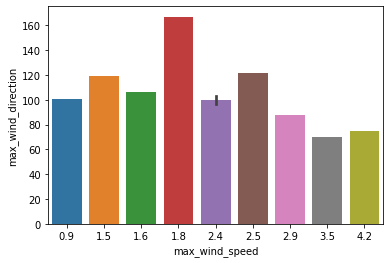

In [16]:
sns.barplot(x=sampled_df["max_wind_speed"][:10], y=sampled_df["max_wind_direction"][:10], data=sampled_df)


<AxesSubplot:xlabel='max_wind_direction', ylabel='count'>

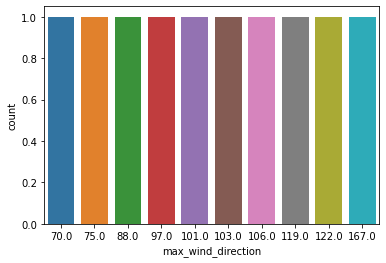

In [17]:
sns.countplot(x=sampled_df['max_wind_direction'][:10],data=sampled_df)

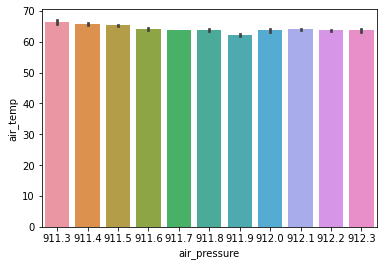

In [18]:
sns.barplot(x=data["air_pressure"][:200], y=data["air_temp"][:200], data=sampled_df)
plt.show()

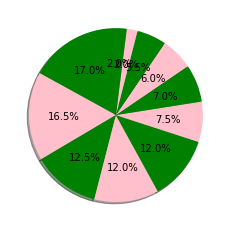

In [19]:

fig, ax1=plt.subplots()
value=data['air_pressure'][:200].value_counts().values
colors=["green","pink"]
ax1.pie(value,autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.show()

In [20]:
sampled_df

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587210,1587210,2014-09-10 23:13:29,915.9,75.56,330.0,1.0,341.0,1.3,310.0,0.8,0.0,0.0,47.8
1587220,1587220,2014-09-10 23:23:29,915.9,75.56,330.0,1.1,341.0,1.4,316.0,0.9,0.0,0.0,48.0
1587230,1587230,2014-09-10 23:33:29,915.9,75.56,344.0,1.4,352.0,1.7,338.0,1.2,0.0,0.0,48.0
1587240,1587240,2014-09-10 23:43:29,915.9,75.20,359.0,1.3,9.0,1.6,347.0,1.0,0.0,0.0,46.3


In [25]:
X= StandardScaler().fit_transform(data)
X


array([[-1.4845918 ,  0.24548315, -0.68235146, ..., -0.83956588,
        -0.64923024,  0.49233814],
       [-1.4845918 ,  0.16942281, -0.01013968, ..., -1.27049991,
        -1.10759246, -0.29367075],
       [-1.4845918 ,  0.19984694, -0.89241765, ...,  1.61265391,
        -1.05029719, -0.17538786],
       ...,
       [-0.30484762,  1.08214687, -1.54362281, ...,  1.91020359,
        -0.53463969, -0.04947381],
       [-0.30484762,  1.08214687, -1.61714598, ...,  1.93072426,
        -0.42004913, -0.05328939],
       [-0.30484762,  1.08214687, -1.57513274, ...,  1.95124493,
        -0.36275385, -0.04947381]])

In [26]:
#KMeans(n_clusters=12)
kmeans = KMeans()
model = kmeans.fit(X)

In [27]:
centers = model.cluster_centers_
centers


array([[ 0.08849897,  0.68166388,  0.71177836, -0.6578935 ,  0.92204228,
        -0.63949486,  0.4451784 , -0.66119862, -0.57003728],
       [ 0.2603955 ,  0.17644245, -1.13756519, -0.49203129, -1.02972549,
        -0.517094  , -1.30476078, -0.43271758, -0.32041288],
       [-1.04963671, -0.89924626,  0.42751549,  1.70756596,  0.51815898,
         1.64439339,  0.25583988,  1.72967117,  0.97771859],
       [ 0.29802796,  0.27035555, -1.52471754, -0.6113936 , -1.20389653,
        -0.53760489,  1.79713131, -0.66253152, -0.35447831],
       [ 1.23945975, -0.21487381, -1.15011021,  1.78495922, -1.05269202,
         1.87664991, -1.30031055,  1.58957281, -1.10634356],
       [-0.20911455,  0.55157743,  0.39087537,  0.54719613,  0.49262296,
         0.48524162,  0.22913906,  0.59694036, -0.17633249],
       [-0.27833375, -1.02557099,  0.44626258, -0.31882238,  0.61334344,
        -0.30353106,  0.20965241, -0.33401663,  1.22453825],
       [ 0.23780993,  0.28192039,  1.89068868, -0.64840843, -1